# 빅데이터 분석 프로젝트
## 제주도 창업을 위한 소비 패턴 분석
### 01. 제주도의 연간 카드 이용금액은 어떻게 될까?

In [2]:
# 패키지 설치 및 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import MarkerCluster

# 데이터 불러오기
card1 = pd.read_csv('/content/제주도_카드_17.csv', encoding='cp949')
card2 = pd.read_csv('/content/제주도_카드_18.csv', encoding='cp949')
card3 = pd.read_csv('/content/제주도_카드_19.csv', encoding='cp949')
card4 = pd.read_csv('/content/제주도_카드_20.csv', encoding='cp949')

# 데이터 출력
card1, card2, card3, card4

(                년월   시도명 지역구분  읍면동명    업종코드       업종명 이용자 구분 관광구분   연령대    성별  \
 0       2017-01-01  서귀포시   읍면   안덕면  G47121      슈퍼마켓   제주도민   도민  30.0    남성   
 1       2017-01-01  서귀포시   도심   서귀동  I56211  일반유흥 주점업     법인   단체   NaN  알수없음   
 2       2017-01-01  서귀포시   도심   서귀동  I56211  일반유흥 주점업    내국인   개별  70.0    남성   
 3       2017-01-01  서귀포시   도심   서귀동  I56211  일반유흥 주점업   제주도민   도민  70.0    남성   
 4       2017-01-01  서귀포시   도심   서귀동  I56211  일반유흥 주점업   제주도민   도민  70.0    여성   
 ...            ...   ...  ...   ...     ...       ...    ...  ...   ...   ...   
 478617  2017-12-01   제주시   도심  이도이동  I55112       여관업   제주도민   도민  40.0    남성   
 478618  2017-12-01   제주시   도심  이도이동  I55112       여관업     법인   개별   NaN  알수없음   
 478619  2017-12-01   제주시   도심  이도이동  I55112       여관업    내국인   개별  60.0    남성   
 478620  2017-12-01   제주시   도심  이도일동  I55112       여관업   제주도민   도민  60.0    여성   
 478621  2017-12-01   제주시   도심  이도이동  I55112       여관업   기타외국   개별   NaN  알수없음   
 
              

In [3]:
# 데이터 병합
card = pd.concat([card1, card2, card3, card4])

# 데이터 크기
card.shape

# 데이터 속성
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000868 entries, 0 to 517130
Data columns (total 14 columns):
 #   Column   Dtype  
---  ------   -----  
 0   년월       object 
 1   시도명      object 
 2   지역구분     object 
 3   읍면동명     object 
 4   업종코드     object 
 5   업종명      object 
 6   이용자 구분   object 
 7   관광구분     object 
 8   연령대      float64
 9   성별       object 
 10  이용금액     int64  
 11  매장수      int64  
 12  업종명 대분류  object 
 13  데이터기준일자  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 229.0+ MB


In [4]:
# 사용하지 않는 컬럼, 행 삭제
card.drop(columns = ['업종코드', '데이터기준일자'], axis=1, inplace=True)

# 년월 컬럼 분리
card['년월'] = pd.to_datetime(card['년월'], format='%Y-%m')
card['연'] = card['년월'].dt.year.astype(int)
card['월'] = card['년월'].dt.month.astype(int)

# column 인덱스 재정렬
new_card = ['연', '월'] + [i for i in card.columns if i not in ['연', '월', '년월']]
card_data = card[new_card]

# 결측치 알수없음으로 채움
card_data = card_data.copy()
card_data['관광구분'].fillna('알수없음', inplace=True)

# 전처리
card_data['이용자 구분'] = card_data['이용자 구분'].replace(['중국', '일본', '동남아', '기타외국'], '외국인')

# 데이터 출력
card_data

,연,월,시도명,지역구분,읍면동명,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류
0,2017,1,서귀포시,읍면,안덕면,슈퍼마켓,제주도민,도민,30.0,남성,1527890,214,소매업
1,2017,1,서귀포시,도심,서귀동,일반유흥 주점업,법인,단체,NaN,알수없음,24368000,275,음식점업
2,2017,1,서귀포시,도심,서귀동,일반유흥 주점업,내국인,개별,70.0,남성,630000,275,음식점업
3,2017,1,서귀포시,도심,서귀동,일반유흥 주점업,제주도민,도민,70.0,남성,10790000,275,음식점업
4,2017,1,서귀포시,도심,서귀동,일반유흥 주점업,제주도민,도민,70.0,여성,684000,275,음식점업
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517126,2020,12,서귀포시,읍면,안덕면,한식 음식점업,내국인,개별,60.0,여성,4608000,2697,음식점업
517127,2020,12,서귀포시,도심,색달동,한식 음식점업,제주도민,도민,70.0,남성,1526000,2697,음식점업
517128,2020,12,서귀포시,도심,대포동,한식 음식점업,내국인,단체,60.0,남성,1723000,2697,음식점업
517129,2020,12,서귀포시,도심,호근동,한식 음식점업,법인,단체,NaN,알수없음,4104000,2697,음식점업


In [5]:
# 데이터 속성 출력
card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000868 entries, 0 to 517130
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   연        int64  
 1   월        int64  
 2   시도명      object 
 3   지역구분     object 
 4   읍면동명     object 
 5   업종명      object 
 6   이용자 구분   object 
 7   관광구분     object 
 8   연령대      float64
 9   성별       object 
 10  이용금액     int64  
 11  매장수      int64  
 12  업종명 대분류  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 213.7+ MB


In [6]:
# 연도별 총 이용금액
total_amount_2017 = card_data[card_data['연'] == 2017]['이용금액'].sum()
total_amount_2018 = card_data[card_data['연'] == 2018]['이용금액'].sum()
total_amount_2019 = card_data[card_data['연'] == 2019]['이용금액'].sum()
total_amount_2020 = card_data[card_data['연'] == 2020]['이용금액'].sum()

# 새로운 데이터프레임 생성
total_amount = pd.DataFrame({
    '연도': [2017, 2018, 2019, 2020],
    '총 이용금액': [total_amount_2017, total_amount_2018, total_amount_2019, total_amount_2020]
})

# 데이터 출력
total_amount

,연도,총 이용금액
0,2017,2028726685819
1,2018,2045393606570
2,2019,2056330819841
3,2020,1890911803625


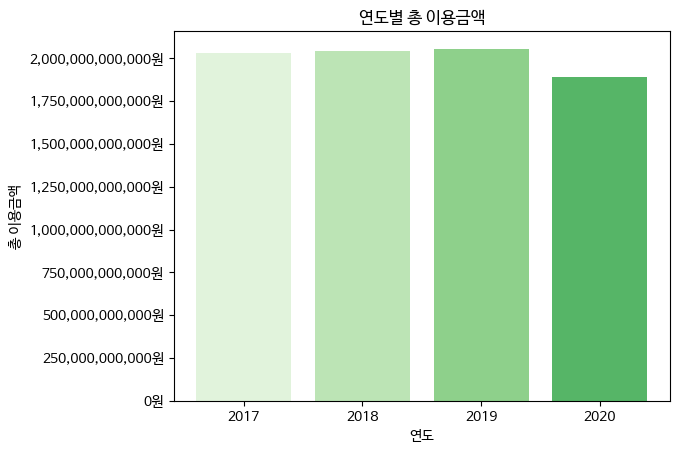

In [7]:
# 폰트 설치
!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 연도별 총 이용금액 시각화

# y축의 값이 1e12같이 지수로 나오는 것을 숫자로 변경
def currency_formatter(x, pos):
    return '{:,.0f}원'.format(x)
formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

green_palette = sns.color_palette('Greens')

# x축에 '연도' 열에 있는 값들만 표시되게끔 변경
plt.xticks(total_amount['연도'])

plt.xlabel('연도')
plt.ylabel('총 이용금액')
plt.title('연도별 총 이용금액')
plt.bar(total_amount['연도'], total_amount['총 이용금액'], color=green_palette)

plt.show()

### 02. 업종별 대분류에 따른 이용금액 차이 - 업종별로 얼마나 차이가 날까?

In [8]:
# 새로운 데이터프레임 생성
grouped_data = card_data.groupby(['연', '업종명 대분류'])['이용금액'].sum().reset_index()

category_amount = pd.DataFrame({
    '연도': grouped_data['연'],
    '업종명 대분류': grouped_data['업종명 대분류'],
    '이용금액': grouped_data['이용금액']
})

# 결과 출력
category_amount

,연도,업종명 대분류,이용금액
0,2017,서비스업,97215387616
1,2017,소매업,970723499831
2,2017,숙박업,152962823325
3,2017,운송업,66439734176
4,2017,음식점업,666429884984
5,2017,임대업,74860246777
6,2018,서비스업,92078096054
7,2018,소매업,993552818657
8,2018,숙박업,153844590233
9,2018,운송업,67118132910


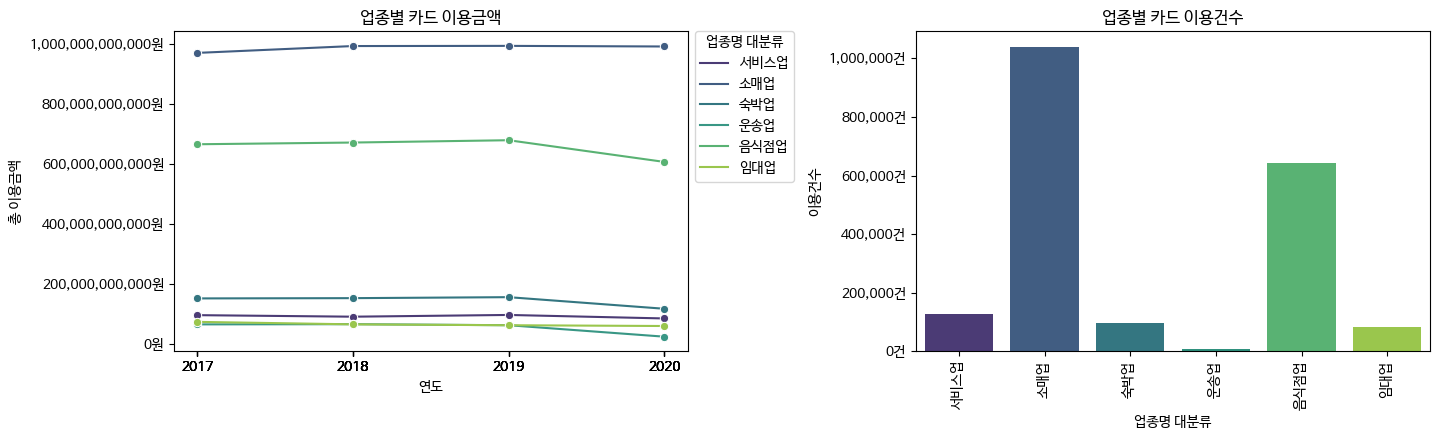

In [9]:
# Figure 생성
plt.figure(figsize=(14.5, 4.5))

# seaborn을 사용한 꺾은선 그래프 시각화
plt.subplot(1, 2, 1)
sns.lineplot(x='연도', y='이용금액', hue='업종명 대분류', marker='o', data=category_amount,
             palette=['#4B3B75', '#415D82', '#347681', '#399785', '#59B273', '#9AC64D'])

# y축 레이블 포맷팅
def currency_formatter(x, pos):
    return '{:,.0f}원'.format(x)

formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(category_amount['연도'])

plt.xlabel('연도')
plt.ylabel('총 이용금액')
plt.title('업종별 카드 이용금액')
plt.legend(title='업종명 대분류', bbox_to_anchor=(1, 1.023))

# seaborn을 사용한 막대그래프 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='업종명 대분류', y='이용금액',
            data=card_data.groupby('업종명 대분류')['이용금액'].count().reset_index(), palette='viridis')

# y축 레이블 포맷팅
def count_formatter(x, pos):
    return '{:,.0f}건'.format(x)

count_formatter = FuncFormatter(count_formatter)
plt.gca().yaxis.set_major_formatter(count_formatter)  # 수정된 부분

plt.xlabel('업종명 대분류')
plt.ylabel('이용건수')
plt.title('업종별 카드 이용건수')
plt.xticks(rotation=90)  # x축 레이블 회전

plt.tight_layout()
plt.show()

### 03. 소매업 종류 간 이용금액 차이 - 소매업 종류 중 어떤 업종이 상승세일까?

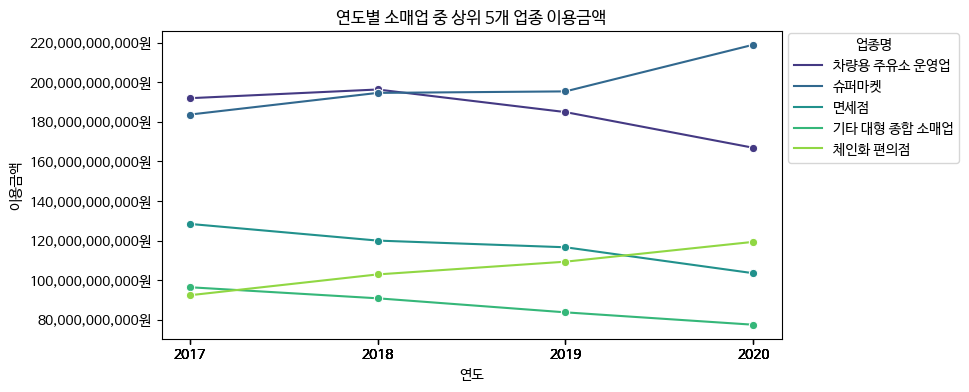

In [10]:
# 업종명 대분류가 소매업인 데이터 추출
retail_data = card_data[card_data['업종명 대분류'] == '소매업']

# 연도별 업종명 이용금액 상위 5개 추출
top_5_categories_by_year = retail_data.groupby(['연', '업종명'])['이용금액'].sum().reset_index()
top_5_categories_by_year = top_5_categories_by_year.sort_values(by=['연', '이용금액'], ascending=[True, False])
top_5_categories_by_year = top_5_categories_by_year.groupby('연').head(5)

# 꺾은선 그래프 시각화
plt.figure(figsize=(8, 4))
sns.lineplot(x='연', y='이용금액', hue='업종명', marker='o', data=top_5_categories_by_year, palette='viridis')

# y축 레이블 포맷팅
def currency_formatter(x, pos):
    return '{:,.0f}원'.format(x)

formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(category_amount['연도'])

plt.xlabel('연도')
plt.ylabel('이용금액')
plt.title('연도별 소매업 중 상위 5개 업종 이용금액')
plt.legend(title='업종명', bbox_to_anchor=(1, 1.015))
plt.show()

### 04. 체인화 편의점과 슈퍼마켓 - 이용자와 성별, 이용건수, 이용금액은 어떻게 될까?

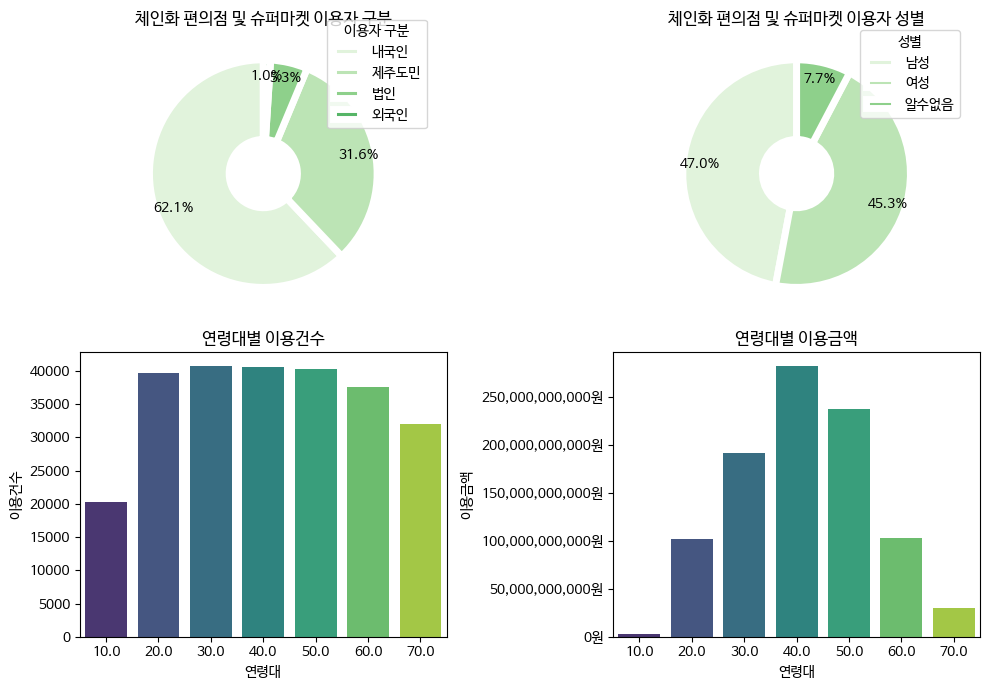

In [11]:
# 업종명이 체인화 편의점이거나 슈퍼마켓인 행만 추출
month_data = card_data[card_data['업종명'].isin(['체인화 편의점', '슈퍼마켓'])]

# 이용자 구분에 따른 빈도수 계산
user_type_counts = month_data['이용자 구분'].value_counts()

# 파이 그래프 시각화
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# 첫 번째 subplot: 이용자 구분 파이 그래프
ax1 = axes[0, 0]
ax1.pie(user_type_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=green_palette,
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}, pctdistance=0.85)
ax1.legend(user_type_counts.index, title='이용자 구분', loc='center left', bbox_to_anchor=(0.7, 0.85))
ax1.set_title('체인화 편의점 및 슈퍼마켓 이용자 구분')

# 두 번째 subplot: 성별 파이 그래프
user_type_counts = month_data['성별'].value_counts()
ax2 = axes[0, 1]
ax2.pie(user_type_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=green_palette,
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}, pctdistance=0.85)
ax2.legend(user_type_counts.index, title='성별', loc='center left', bbox_to_anchor=(0.7, 0.85))
ax2.set_title('체인화 편의점 및 슈퍼마켓 이용자 성별')

# 세 번째 subplot: 연령대별 이용건수 막대 그래프
user_type_counts = month_data['연령대'].value_counts().sort_index()
ax3 = axes[1, 0]
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis', ax=ax3)
ax3.set_xlabel('연령대')
ax3.set_ylabel('이용건수')
ax3.set_title('연령대별 이용건수')

# 네 번째 subplot: 연령대별 이용금액 막대 그래프
age_grouped = month_data.groupby('연령대')['이용금액'].sum().reset_index()
ax4 = axes[1, 1]
sns.barplot(x='연령대', y='이용금액', data=age_grouped, palette='viridis', ax=ax4)
ax4.set_xlabel('연령대')
ax4.set_ylabel('이용금액')
ax4.set_title('연령대별 이용금액')
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}원'.format(x)))

plt.tight_layout()
plt.show()

### 05. 지역 간 유동인구 차이 - 유동인구는 어디가 가장 높을까?

In [12]:
# 데이터 불러오기
fp = pd.read_csv('/content/제주도_유동인구.csv', encoding='cp949')

fp

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,데이터기준일자
0,2019-01,서귀포시,남원읍,건강보조식품 소매업,8,472000,16257181.37,2020-12-15
1,2019-01,서귀포시,남원읍,골프장 운영업,3667,608346185,16257181.37,2020-12-15
2,2019-01,서귀포시,남원읍,과실 및 채소 소매업,1525,135385807,16257181.37,2020-12-15
3,2019-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,241,4915500,16257181.37,2020-12-15
4,2019-01,서귀포시,남원읍,그외 기타 종합 소매업,15,11905000,16257181.37,2020-12-15
...,...,...,...,...,...,...,...,...
14210,2019-12,제주시,화북동,차량용 주유소 운영업,10959,700951208,25379384.28,2020-12-15
14211,2019-12,제주시,화북동,체인화 편의점,18150,158835020,25379384.28,2020-12-15
14212,2019-12,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2436,48855810,25379384.28,2020-12-15
14213,2019-12,제주시,화북동,한식 음식점업,17626,670361636,25379384.28,2020-12-15


In [13]:
# 사용하지 않는 컬럼 삭제
fp.drop(columns = ['년월', '데이터기준일자', '업종명', '이용자수', '이용금액'], axis=1, inplace=True)

# '읍면동명' 열의 이름을 '읍명'으로 변경
fp = fp.rename(columns={'읍면동명': '읍명'})

# 중복되는 행 제거
fp = fp[fp['읍명'].str.endswith('읍')].drop_duplicates(subset=['읍명']).reset_index(drop=True)

fp

,시도명,읍명,총 유동인구
0,서귀포시,남원읍,16257181.37
1,서귀포시,대정읍,17779006.65
2,서귀포시,성산읍,16621684.52
3,제주시,구좌읍,14776371.82
4,제주시,애월읍,42001707.54
5,제주시,조천읍,22771655.68
6,제주시,한림읍,21789861.37


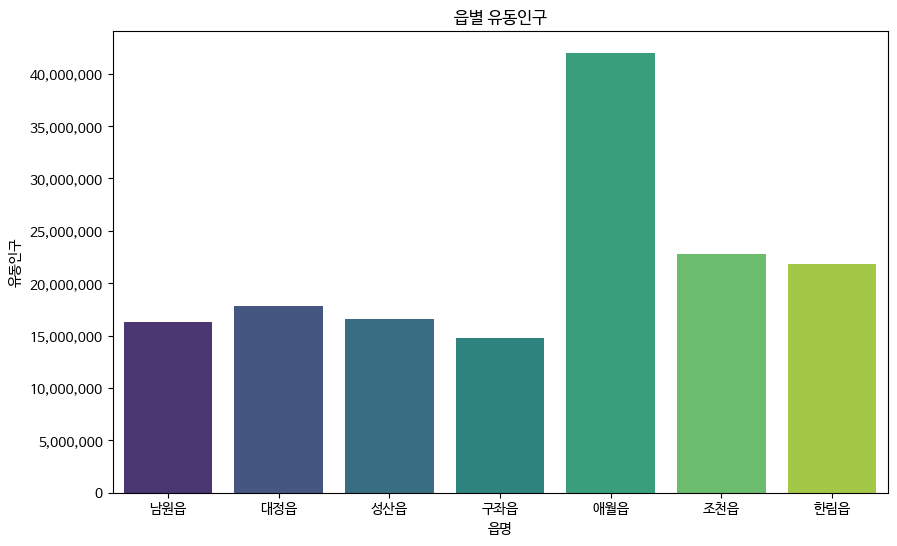

In [14]:
# 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='읍명', y='총 유동인구', data=fp, palette='viridis')

plt.xlabel('읍명')
plt.ylabel('유동인구')
plt.title('읍별 유동인구')

# y축 레이블 포맷팅 (소수점 없애기)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

### 06. 편의점과 마트 분포 지역 - 어느 지역에 가장 많이 분포되어 있을까?

In [15]:
# 데이터 불러오기
mart = pd.read_csv('/content/제주관광공사_마을편의시설.csv', encoding='utf-8')

mart

,마을명,시군구명,읍면동명,행정리명,편의시설명,편의시설유형,소재지전화번호,소재지도로명주소,소재지지번주소,위도,경도,인허가일자,상세영업상태코드,상세영업상태명,휴무일,운영시간,데이터기준일자
0,남원1리마을,서귀포시,남원읍,남원1리,남제주할인마트,마트,064-764-7557,제주특별자치도 서귀포시 남원읍 태위로 662,제주특별자치도 서귀포시 남원읍 남원리 113-7,33.278446,126.717439,NaN,13,영업중,연중무휴,(평일+주말+공휴일)06:00~23:00,2022-09-30
1,남원1리마을,서귀포시,남원읍,남원1리,나들가게평화슈퍼,마트,064-764-4244,제주특별자치도 서귀포시 남원읍 태위로689번길 7,제주특별자치도 서귀포시 남원읍 남원리 203-6,33.280014,126.719909,NaN,13,영업중,연중무휴,(평일+주말+공휴일)08:00~22:00,2022-09-30
2,남원1리마을,서귀포시,남원읍,남원1리,남원슈퍼,마트,064-764-4964,제주특별자치도 서귀포시 남원읍 태위로 631-1,제주특별자치도 서귀포시 남원읍 남원리 1339-6,33.278058,126.714244,NaN,13,영업중,연중무휴,(평일+주말+공휴일)07:00~23:00,2022-09-30
3,남원1리마을,서귀포시,남원읍,남원1리,제주남원우체국,우체국,064-764-1117,제주특별자치도 서귀포시 남원읍 태위로 632,제주특별자치도 서귀포시 남원읍 남원리 1349-1,33.277697,126.714208,NaN,13,영업중,토요일+일요일+공휴일,(평일)09:00~18:00,2022-09-30
4,남원1리마을,서귀포시,남원읍,남원1리,제주은행 남원출장소,은행,064-764-2121,제주특별자치도 서귀포시 남원읍 태위로 701,제주특별자치도 서귀포시 남원읍 남원리 209-3,33.279943,126.721347,NaN,13,영업중,토요일+일요일+공휴일,(평일)09:30~15:30,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,한림2리마을,제주시,한림읍,한림2리,체육관입구 아래쪽 도로(백부장집),클린하우스,NaN,NaN,제주특별자치도 제주시 한림읍 한림리 915-9,33.408940,126.266231,NaN,18,사용중,연중무휴,(평일+주말+공휴일)15:00~04:00,2022-09-30
2447,한림2리마을,제주시,한림읍,한림2리,CU 한림중앙점,편의점,070-8900-0297,제주특별자치도 제주시 한림읍 한림중앙로 23,제주특별자치도 제주시 한림읍 한림리 1115-2,33.412693,126.265022,2010-11-23,13,영업중,연중무휴,(평일+주말+공휴일)00:00~24:00,2022-09-30
2448,한림2리마을,제주시,한림읍,한림2리,CU 한림상로점,편의점,NaN,제주특별자치도 제주시 한림읍 한림상로 186 1층,제주특별자치도 제주시 한림읍 한림리 1252-6,33.414980,126.269424,2021-08-26,13,영업중,연중무휴,(평일+주말+공휴일)00:00~24:00,2022-09-30
2449,한림2리마을,제주시,한림읍,한림2리,CU 제주한림점,편의점,064-796-6153,제주특별자치도 제주시 한림읍 한림로 698,제주특별자치도 제주시 한림읍 한림리 1313-3,33.416867,126.265019,NaN,13,영업중,연중무휴,(평일+주말+공휴일)00:00~24:00,2022-09-30


In [16]:
# 데이터 속성
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   마을명       2451 non-null   object 
 1   시군구명      2451 non-null   object 
 2   읍면동명      2451 non-null   object 
 3   행정리명      2451 non-null   object 
 4   편의시설명     2450 non-null   object 
 5   편의시설유형    2451 non-null   object 
 6   소재지전화번호   1548 non-null   object 
 7   소재지도로명주소  1591 non-null   object 
 8   소재지지번주소   2451 non-null   object 
 9   위도        2451 non-null   float64
 10  경도        2451 non-null   float64
 11  인허가일자     509 non-null    object 
 12  상세영업상태코드  2451 non-null   int64  
 13  상세영업상태명   2451 non-null   object 
 14  휴무일       2277 non-null   object 
 15  운영시간      2225 non-null   object 
 16  데이터기준일자   2451 non-null   object 
dtypes: float64(2), int64(1), object(14)
memory usage: 325.6+ KB


In [17]:
# 사용하지 않는 컬럼, 행 삭제
mart.drop(columns = ['인허가일자', '상세영업상태코드', '상세영업상태명', '소재지전화번호', '데이터기준일자'], axis=1, inplace=True)

# 데이터 출력
mart

,마을명,시군구명,읍면동명,행정리명,편의시설명,편의시설유형,소재지도로명주소,소재지지번주소,위도,경도,휴무일,운영시간
0,남원1리마을,서귀포시,남원읍,남원1리,남제주할인마트,마트,제주특별자치도 서귀포시 남원읍 태위로 662,제주특별자치도 서귀포시 남원읍 남원리 113-7,33.278446,126.717439,연중무휴,(평일+주말+공휴일)06:00~23:00
1,남원1리마을,서귀포시,남원읍,남원1리,나들가게평화슈퍼,마트,제주특별자치도 서귀포시 남원읍 태위로689번길 7,제주특별자치도 서귀포시 남원읍 남원리 203-6,33.280014,126.719909,연중무휴,(평일+주말+공휴일)08:00~22:00
2,남원1리마을,서귀포시,남원읍,남원1리,남원슈퍼,마트,제주특별자치도 서귀포시 남원읍 태위로 631-1,제주특별자치도 서귀포시 남원읍 남원리 1339-6,33.278058,126.714244,연중무휴,(평일+주말+공휴일)07:00~23:00
3,남원1리마을,서귀포시,남원읍,남원1리,제주남원우체국,우체국,제주특별자치도 서귀포시 남원읍 태위로 632,제주특별자치도 서귀포시 남원읍 남원리 1349-1,33.277697,126.714208,토요일+일요일+공휴일,(평일)09:00~18:00
4,남원1리마을,서귀포시,남원읍,남원1리,제주은행 남원출장소,은행,제주특별자치도 서귀포시 남원읍 태위로 701,제주특별자치도 서귀포시 남원읍 남원리 209-3,33.279943,126.721347,토요일+일요일+공휴일,(평일)09:30~15:30
...,...,...,...,...,...,...,...,...,...,...,...,...
2446,한림2리마을,제주시,한림읍,한림2리,체육관입구 아래쪽 도로(백부장집),클린하우스,NaN,제주특별자치도 제주시 한림읍 한림리 915-9,33.408940,126.266231,연중무휴,(평일+주말+공휴일)15:00~04:00
2447,한림2리마을,제주시,한림읍,한림2리,CU 한림중앙점,편의점,제주특별자치도 제주시 한림읍 한림중앙로 23,제주특별자치도 제주시 한림읍 한림리 1115-2,33.412693,126.265022,연중무휴,(평일+주말+공휴일)00:00~24:00
2448,한림2리마을,제주시,한림읍,한림2리,CU 한림상로점,편의점,제주특별자치도 제주시 한림읍 한림상로 186 1층,제주특별자치도 제주시 한림읍 한림리 1252-6,33.414980,126.269424,연중무휴,(평일+주말+공휴일)00:00~24:00
2449,한림2리마을,제주시,한림읍,한림2리,CU 제주한림점,편의점,제주특별자치도 제주시 한림읍 한림로 698,제주특별자치도 제주시 한림읍 한림리 1313-3,33.416867,126.265019,연중무휴,(평일+주말+공휴일)00:00~24:00


In [18]:
# 편의시설유형이 편의점이거나 마트인 행만 추출
mart_data = mart[mart['편의시설유형'].isin(['편의점', '마트'])].reset_index(drop=True)

mart_data

,마을명,시군구명,읍면동명,행정리명,편의시설명,편의시설유형,소재지도로명주소,소재지지번주소,위도,경도,휴무일,운영시간
0,남원1리마을,서귀포시,남원읍,남원1리,남제주할인마트,마트,제주특별자치도 서귀포시 남원읍 태위로 662,제주특별자치도 서귀포시 남원읍 남원리 113-7,33.278446,126.717439,연중무휴,(평일+주말+공휴일)06:00~23:00
1,남원1리마을,서귀포시,남원읍,남원1리,나들가게평화슈퍼,마트,제주특별자치도 서귀포시 남원읍 태위로689번길 7,제주특별자치도 서귀포시 남원읍 남원리 203-6,33.280014,126.719909,연중무휴,(평일+주말+공휴일)08:00~22:00
2,남원1리마을,서귀포시,남원읍,남원1리,남원슈퍼,마트,제주특별자치도 서귀포시 남원읍 태위로 631-1,제주특별자치도 서귀포시 남원읍 남원리 1339-6,33.278058,126.714244,연중무휴,(평일+주말+공휴일)07:00~23:00
3,남원1리마을,서귀포시,남원읍,남원1리,GS25 제주남원점,편의점,제주특별자치도 서귀포시 남원읍 태위로 680-1,제주특별자치도 서귀포시 남원읍 남원리 107-4,33.279009,126.719163,연중무휴,(평일+주말+공휴일)00:00~24:00
4,남원1리마을,서귀포시,남원읍,남원1리,CU 서귀포남원길점,편의점,제주특별자치도 서귀포시 남원읍 태위로 481,제주특별자치도 서귀포시 남원읍 남원리 2453-1,33.275122,126.698631,연중무휴,(평일+주말+공휴일)00:00~24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
562,한림1리마을,제주시,한림읍,한림1리,CU 한림오거리점,편의점,제주특별자치도 제주시 한림읍 한림로 626 1층,제주특별자치도 제주시 한림읍 한림리 1385-5,33.412355,126.260800,연중무휴,(평일+주말+공휴일)00:00~24:00
563,한림2리마을,제주시,한림읍,한림2리,한아름마트,마트,제주특별자치도 제주시 한림읍 명랑로 4,제주특별자치도 제주시 한림읍 한림리 1071,33.414615,126.265272,일요일,(평일+토요일+공휴일)08:00~22:00
564,한림2리마을,제주시,한림읍,한림2리,CU 한림중앙점,편의점,제주특별자치도 제주시 한림읍 한림중앙로 23,제주특별자치도 제주시 한림읍 한림리 1115-2,33.412693,126.265022,연중무휴,(평일+주말+공휴일)00:00~24:00
565,한림2리마을,제주시,한림읍,한림2리,CU 한림상로점,편의점,제주특별자치도 제주시 한림읍 한림상로 186 1층,제주특별자치도 제주시 한림읍 한림리 1252-6,33.414980,126.269424,연중무휴,(평일+주말+공휴일)00:00~24:00


#### [지도 1]

In [19]:
# 지도 생성
map = folium.Map(location=[33.3628, 126.5338], zoom_start=11, tiles='CartoDB dark_matter')

# '마트'와 '편의점'을 구분하여 CircleMarker로 표시
for name, lat, lng, facility_type in zip(mart_data.편의시설명, mart_data.위도, mart_data.경도, mart_data.편의시설유형):
    color = 'yellow' if facility_type == '마트' else 'red' if facility_type == '편의점' else None

    folium.CircleMarker(
        location=[lat, lng],
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.3,
        popup=name
    ).add_to(map)

# 결과 지도 출력
map

#### [지도 2]

In [21]:
# 지도 생성
map = folium.Map(location=[33.3628, 126.5338], zoom_start=11)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(map)

# '마트'와 '편의점'을 구분하여 마커를 MarkerCluster에 추가
for name, lat, lng, facility_type in zip(mart_data.편의시설명, mart_data.위도,
                                         mart_data.경도, mart_data.편의시설유형):
    color = 'blue' if facility_type == '마트' else 'orange' if facility_type == '편의점' else 'red'
    folium.Marker(
        location=[lat, lng],
        popup=name,
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# 읍면동 경계 GeoJSON 파일 로드 및 추가
geojson_file = "/content/hangjeongdong_제주특별자치도.geojson"
folium.GeoJson(geojson_file, name='geojson_layer',
               style_function=lambda feature: {'weight': 0.7}).add_to(map)

# 결과 지도 출력
map

### 07. 편의점과 마트 카드 이용금액 - 읍별 중 어느 읍에서 가장 많은 금액을 썼을까?

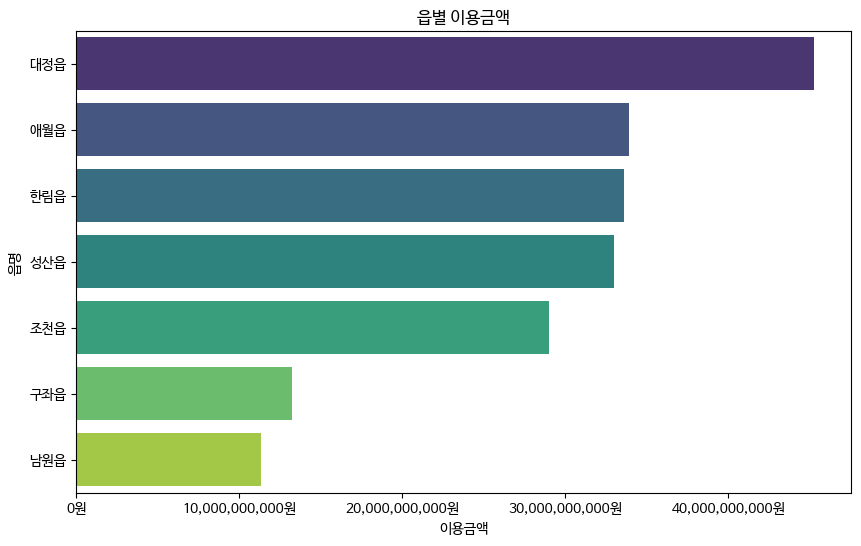

In [22]:
# 읍별 이용금액 계산
area = month_data.groupby('읍면동명')['이용금액'].sum().reset_index()

# '읍'으로 끝나는 행만 선택
filtered_area = area[area['읍면동명'].str.endswith('읍')]

# 이용금액을 기준으로 내림차순 정렬
filtered_area_sorted = filtered_area.sort_values(by='이용금액', ascending=False)

# 가로 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='이용금액', y='읍면동명', data=filtered_area_sorted, palette='viridis')

plt.xlabel('이용금액')
plt.ylabel('읍명')
plt.title('읍별 이용금액')

# x축 레이블 포맷팅
def currency_formatter(x, pos):
    return '{:,.0f}원'.format(x)

formatter = FuncFormatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()